 # Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

In [33]:
results = read.csv("time_results.csv")

In [34]:
print(results)

          algorithm      time vector_size
1    Scalar Product 0.0000025          50
2    Scalar Product 0.0000003          50
3    Scalar Product 0.0000003          50
4    Scalar Product 0.0000006          50
5    Scalar Product 0.0000001          50
6    Scalar Product 0.0000006          50
7    Scalar Product 0.0000002          50
8    Scalar Product 0.0000002          50
9    Scalar Product 0.0000002          50
10   Scalar Product 0.0000005          50
11  Multiply Matrix 0.0000019          50
12  Multiply Matrix 0.0000016          50
13  Multiply Matrix 0.0000016          50
14  Multiply Matrix 0.0000016          50
15  Multiply Matrix 0.0000011          50
16  Multiply Matrix 0.0000012          50
17  Multiply Matrix 0.0000020          50
18  Multiply Matrix 0.0000011          50
19  Multiply Matrix 0.0000011          50
20  Multiply Matrix 0.0000011          50
21   Scalar Product 0.0000018         100
22   Scalar Product 0.0000003         100
23   Scalar Product 0.0000003     

In [35]:
avg_results <- aggregate(time ~ algorithm:vector_size, data=results, FUN=mean)

In [36]:
print(avg_results)

         algorithm vector_size       time
1  Multiply Matrix          50 0.00000143
2   Scalar Product          50 0.00000055
3  Multiply Matrix         100 0.00000408
4   Scalar Product         100 0.00000046
5  Multiply Matrix         300 0.00012934
6   Scalar Product         300 0.00000350
7  Multiply Matrix         500 0.00024215
8   Scalar Product         500 0.00000504
9  Multiply Matrix         750 0.00057340
10  Scalar Product         750 0.00000953
11 Multiply Matrix        1000 0.00123851
12  Scalar Product        1000 0.00000970


In [37]:
avg_results$sd <- aggregate(time ~ algorithm:vector_size, data=results, FUN=sd)$time

In [38]:
print(avg_results)

         algorithm vector_size       time           sd
1  Multiply Matrix          50 0.00000143 3.529243e-07
2   Scalar Product          50 0.00000055 7.074995e-07
3  Multiply Matrix         100 0.00000408 3.155243e-07
4   Scalar Product         100 0.00000046 4.993329e-07
5  Multiply Matrix         300 0.00012934 6.376922e-05
6   Scalar Product         300 0.00000350 3.214205e-06
7  Multiply Matrix         500 0.00024215 3.198219e-05
8   Scalar Product         500 0.00000504 3.517006e-06
9  Multiply Matrix         750 0.00057340 1.925865e-05
10  Scalar Product         750 0.00000953 5.334385e-06
11 Multiply Matrix        1000 0.00123851 1.200714e-03
12  Scalar Product        1000 0.00000970 8.375361e-06


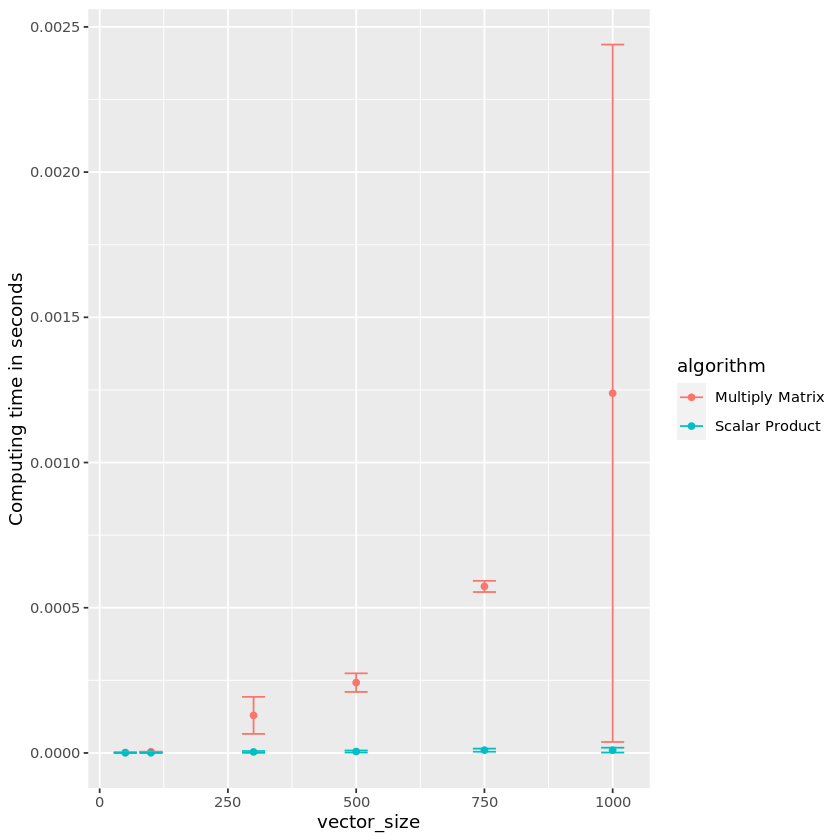

In [39]:
ggplot(avg_results, aes(vector_size, time, color=algorithm)) + geom_point() + ylab("Computing time in seconds") + 
    geom_errorbar(aes(ymin = time-sd, ymax = time+sd))
